In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
df = pd.read_csv("dataset/Fraud.csv")  # Update the filename if needed

# Display basic information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


C:\Users\mostm\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
81286/81286 ━━━━━━━━━━━━━━━━━━━━ 129s 2ms/step - accuracy: 0.9983 - loss: 0.0091 - val_accuracy: 0.9994 - val_loss: 0.0022
Epoch 2/10
81286/81286 ━━━━━━━━━━━━━━━━━━━━ 133s 2ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9994 - val_loss: 0.0021
Epoch 3/10
81286/81286 ━━━━━━━━━━━━━━━━━━━━ 154s 2ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 4/10
81286/81286 ━━━━━━━━━━━━━━━━━━━━ 168s 2ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9996 - val_loss: 0.0016
Epoch 5/10
81286/81286 ━━━━━━━━━━━━━━━━━━━━ 158s 2ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9996 - val_loss: 0.0016
Epoch 6/10
81286/81286 ━━━━━━━━━━━━━━━━━━━━ 148s 2ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 7/10
81286/81286 ━━━━━━━━━━━━━━━━━━━━ 146s 2ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 8/10
81286/81286 ━━━━━━━━━━━━━━━━━━━━ 139s 2ms/step - ac

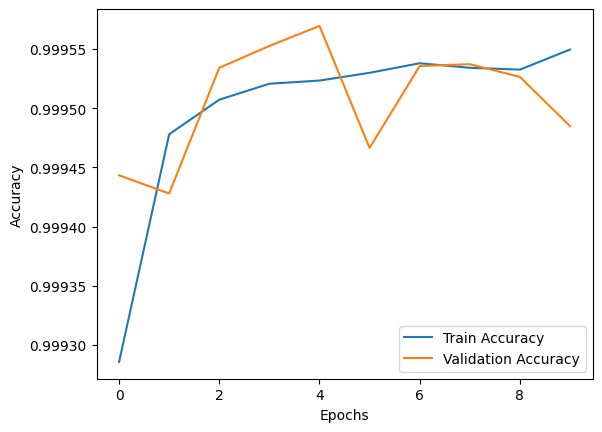

In [4]:

# Drop unnecessary columns
df = df.drop(["nameOrig", "nameDest"], axis=1)

# Convert categorical 'type' column to numerical
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

# Remove outliers using IQR
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Define features and target
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [5]:
from sklearn.metrics import f1_score
# Calculate F1 score
y_pred = (model.predict(X_test) > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

20322/20322 ━━━━━━━━━━━━━━━━━━━━ 18s 880us/step
F1 Score: 0.7206


In [6]:
# Save the model
model.save("fraud_detection_model.h5")
print("Model saved as fraud_detection_model.h5")

Model saved as fraud_detection_model.h5
